# 使用机器学习模型学习人造数据中的规律

导入数据

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, explained_variance_score, mean_squared_error


# 1. 读取数据
df = pd.read_csv('country_inter_gen.csv')
df = df.iloc[:-1, :]  # 使用 iloc 同时对行和列切片，去掉最后一行
df.head()

,A GDP,A Unemployment Rate,A Inflation Rate,A Foreign Debt,A Government Spending,A Military Spending,A Education Spending,A Health Spending,A Environment Spending,A Technology Investment,...,A Technology I,A Health I,B Political I,B Economic I,B Military I,B Diplomatic I,B Social I,B Environmental I,B Technology I,B Health I
0,14514.82,5.73,1.48,307.68,805.93,168.13,72.87,144.91,47.90,240.33,...,0,0,0,0,0,0,0,0,0,0
1,14463.09,5.52,-0.09,305.26,830.80,179.34,73.46,166.45,79.18,242.91,...,1,1,1,2,5,3,2,2,1,1
2,14225.03,5.07,-1.70,298.20,804.90,189.87,73.80,187.53,111.35,245.87,...,1,1,1,2,5,3,2,2,2,1
3,13776.89,4.42,-3.22,287.25,806.75,200.04,75.38,207.06,142.73,245.29,...,1,1,1,2,5,3,2,2,2,1
4,13483.10,3.56,-4.85,282.04,791.58,214.47,73.20,230.93,174.44,247.76,...,1,1,1,2,5,3,2,2,2,1


In [4]:
# 2. 选择需要的列，这里假设你要预测某些行为列（比如A Political T）
# 如果你有多个目标列，可以选择多个目标列
target_columns = ['A Political T', 'A Economic T', 'A Military T', 'A Diplomatic T',
    'A Social T', 'A Environmental T', 'A Technology T', 'A Health T','A Political I', 'A Economic I', 'A Military I', 'A Diplomatic I',
    'A Social I', 'A Environmental I', 'A Technology I', 'A Health I']  # 示例目标列
X = df.drop(columns=target_columns)  # 特征变量
y = df[target_columns]  # 目标变量
#type(X)

In [5]:
# 3. 数据预处理
# 标准化特征数据（可以提高线性回归模型的效果，尤其是特征的量纲不一致时）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.head())

      A GDP  A Unemployment Rate  A Inflation Rate  A Foreign Debt  \
0  0.142599             1.700992          1.730943        0.843973   
1  0.127191             1.700123          1.724420        0.793667   
2  0.056287             1.698259          1.717731        0.646905   
3 -0.077187             1.695566          1.711415        0.419279   
4 -0.164690             1.692004          1.704643        0.310975   

   A Government Spending  A Military Spending  A Education Spending  \
0               0.891848            -1.796658             -0.668686   
1               1.051998            -1.789293             -0.606695   
2               0.885215            -1.782375             -0.570971   
3               0.897128            -1.775693             -0.404961   
4               0.799441            -1.766212             -0.634013   

   A Health Spending  A Environment Spending  A Technology Investment  ...  \
0          -1.732141               -1.729693                -1.484257  ...

In [6]:
# 4. 划分训练集和测试集
# 为了避免数据干扰，可以采用时间序列划分的方式，测试集应为未来的数据
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, shuffle=False)
X_train.head()


,A GDP,A Unemployment Rate,A Inflation Rate,A Foreign Debt,A Government Spending,A Military Spending,A Education Spending,A Health Spending,A Environment Spending,A Technology Investment,...,B Technology T,B Health T,B Political I,B Economic I,B Military I,B Diplomatic I,B Social I,B Environmental I,B Technology I,B Health I
0,0.142599,1.700992,1.730943,0.843973,0.891848,-1.796658,-0.668686,-1.732141,-1.729693,-1.484257,...,-0.299824,-0.591389,-22.803509,-22.803509,-22.803509,-8.331247,-22.803509,-22.803509,-20.392159,-22.803509
1,0.127191,1.700123,1.724420,0.793667,1.051998,-1.789293,-0.606695,-1.725684,-1.723190,-1.483624,...,-1.576035,1.690934,0.043853,0.043853,0.043853,3.849987,0.043853,0.043853,-10.166639,0.043853
2,0.056287,1.698259,1.717731,0.646905,0.885215,-1.782375,-0.570971,-1.719364,-1.716503,-1.482898,...,-1.576035,1.690934,0.043853,0.043853,0.043853,3.849987,0.043853,0.043853,0.058880,0.043853
3,-0.077187,1.695566,1.711415,0.419279,0.897128,-1.775693,-0.404961,-1.713510,-1.709980,-1.483040,...,-1.576035,1.690934,0.043853,0.043853,0.043853,3.849987,0.043853,0.043853,0.058880,0.043853
4,-0.164690,1.692004,1.704643,0.310975,0.799441,-1.766212,-0.634013,-1.706354,-1.703388,-1.482435,...,-1.576035,1.690934,0.043853,0.043853,0.043853,3.849987,0.043853,0.043853,0.058880,0.043853


In [7]:
y_train.head()

,A Political T,A Economic T,A Military T,A Diplomatic T,A Social T,A Environmental T,A Technology T,A Health T,A Political I,A Economic I,A Military I,A Diplomatic I,A Social I,A Environmental I,A Technology I,A Health I
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-4,5,-6,-6,0,-4,0,0,1,2,5,3,2,2,1,1
2,-4,5,-6,-6,0,-4,0,0,1,2,5,3,2,2,1,1
3,-4,5,-6,-6,0,-4,0,0,1,2,5,3,2,2,1,1
4,-4,5,-6,-6,0,-4,0,0,1,2,5,3,2,2,1,1


In [8]:
# 5. 线性回归模型
model = LinearRegression()

# 6. 交叉验证（这里使用KFold进行时间序列的交叉验证）
kf = KFold(n_splits=5, shuffle=False)  # 保证数据按时间顺序划分

In [9]:
# 7. 使用交叉验证评估模型
cross_val_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# 输出交叉验证结果
print("Cross-validation Mean Squared Error: ", -cross_val_results.mean())

Cross-validation Mean Squared Error:  450.67335458068555


In [10]:
# 8. 训练模型
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# 9. 在测试集上评估模型
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test Mean Squared Error: ", mse)

Test Mean Squared Error:  3.7128155363491073


In [12]:
# 计算其他综合指标（多目标回归时默认会对所有目标取均值）
r2 = r2_score(y_test, y_pred, multioutput='uniform_average')
mae = mean_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred, multioutput='uniform_average')

print("Test R² Score: ", r2)
print("Test Mean Absolute Error: ", mae)
print("Test Explained Variance: ", ev)

Test R² Score:  -1.0844560550948135
Test Mean Absolute Error:  0.8316403870005917
Test Explained Variance:  -0.14089572451853077



各目标变量的评价指标：
A Political T -> R²: 0.0000, MAE: 2.4546, MSE: 7.9485
A Economic T -> R²: 0.0000, MAE: 2.0336, MSE: 4.7753
A Military T -> R²: 0.0000, MAE: 0.0000, MSE: 0.0000
A Diplomatic T -> R²: 0.0000, MAE: 1.1353, MSE: 1.6549
A Social T -> R²: 1.0000, MAE: 0.0000, MSE: 0.0000
A Environmental T -> R²: 0.0000, MAE: 0.0000, MSE: 0.0000
A Technology T -> R²: 0.0000, MAE: 1.5448, MSE: 3.6680
A Health T -> R²: -18.3513, MAE: 5.6606, MSE: 41.0721
A Political I -> R²: 0.0000, MAE: 0.0000, MSE: 0.0000
A Economic I -> R²: 0.0000, MAE: 0.0000, MSE: 0.0000
A Military I -> R²: 0.0000, MAE: 0.0000, MSE: 0.0000
A Diplomatic I -> R²: 0.0000, MAE: 0.0000, MSE: 0.0000
A Social I -> R²: 0.0000, MAE: 0.0000, MSE: 0.0000
A Environmental I -> R²: 0.0000, MAE: 0.0000, MSE: 0.0000
A Technology I -> R²: 0.0000, MAE: 0.4774, MSE: 0.2862
A Health I -> R²: 0.0000, MAE: 0.0000, MSE: 0.0000


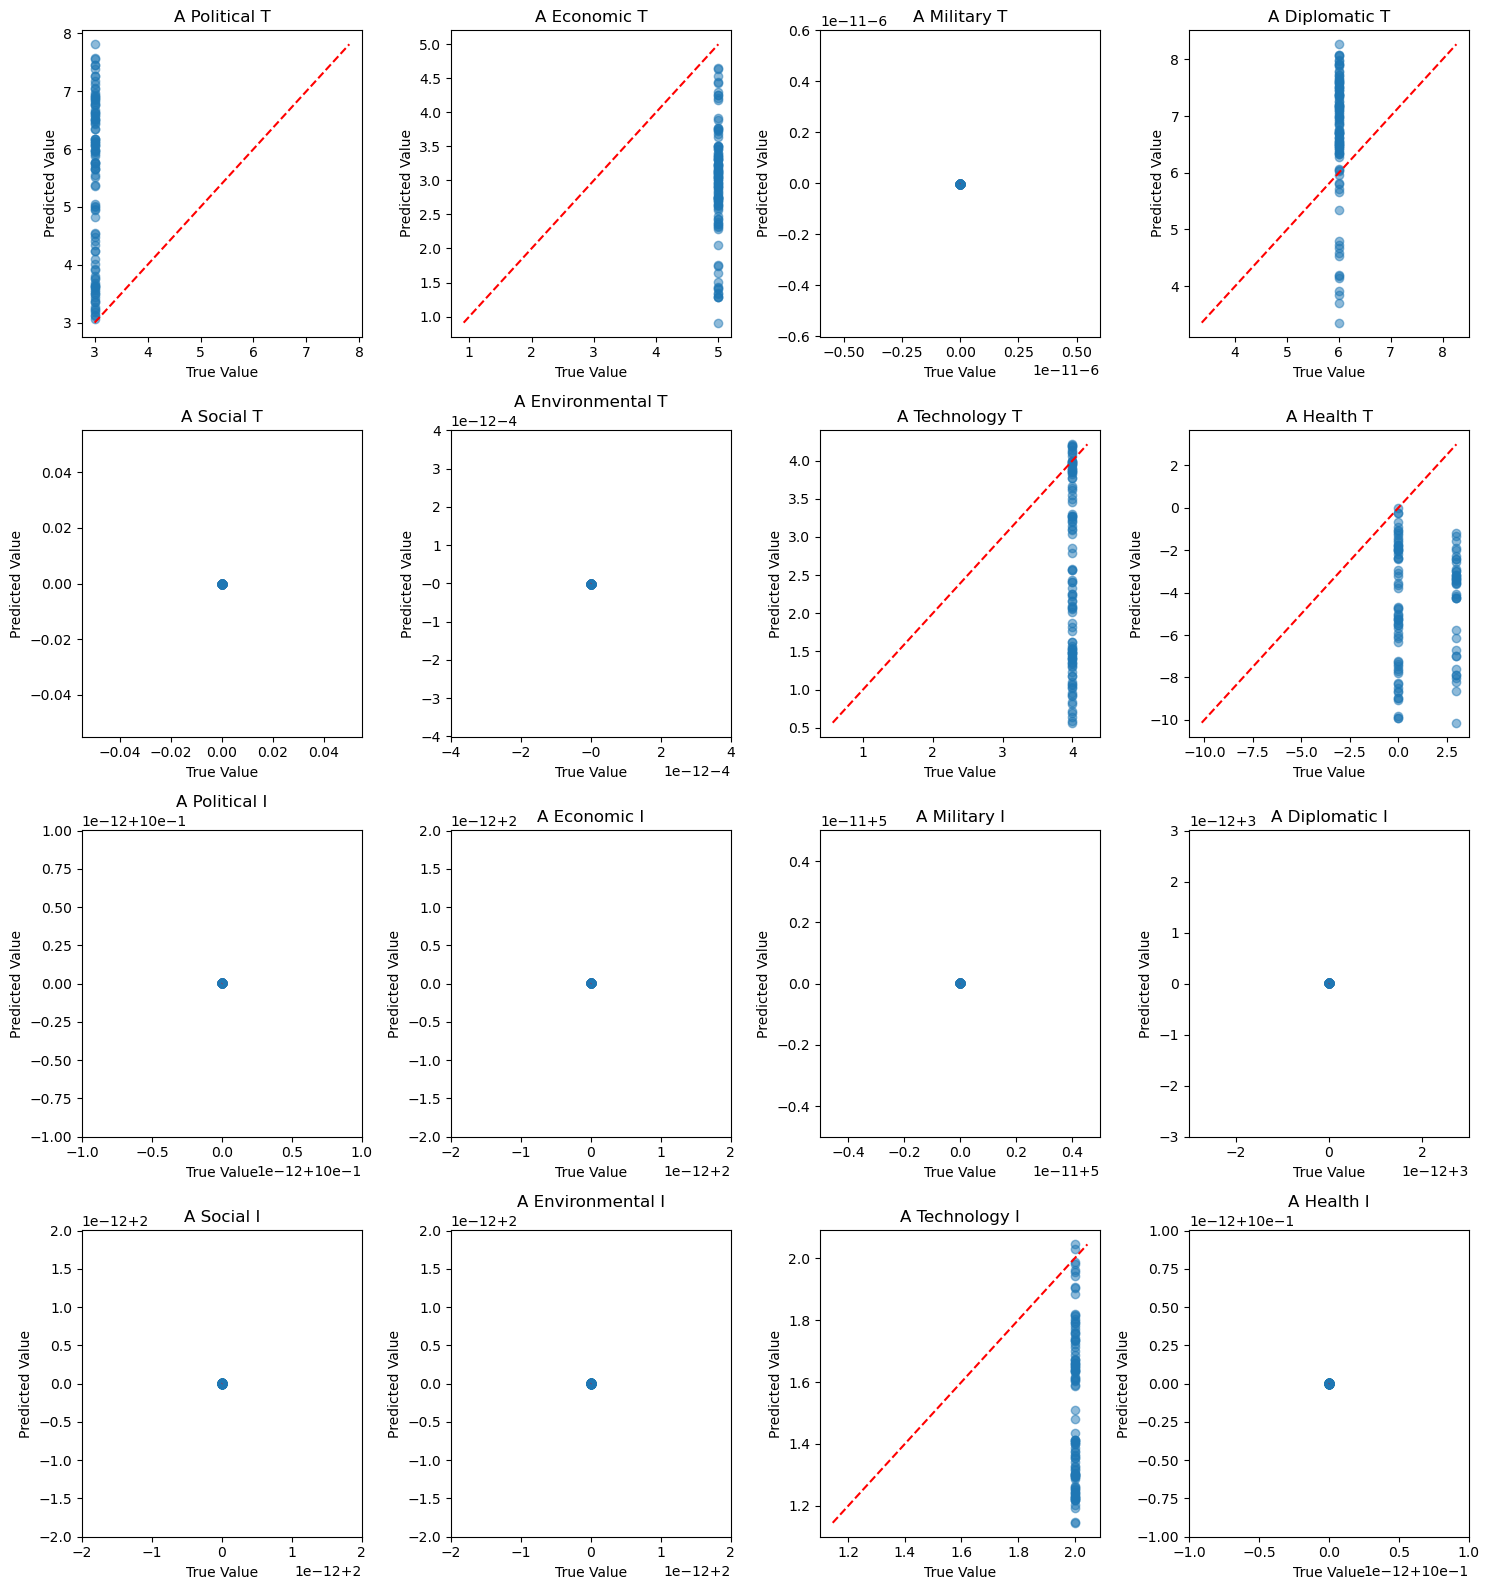

In [13]:
# 针对每个目标变量，分别计算评价指标
print("\n各目标变量的评价指标：")
for col_idx, col in enumerate(y_test.columns):
    r2_col = r2_score(y_test[col], y_pred[:, col_idx])
    mae_col = mean_absolute_error(y_test[col], y_pred[:, col_idx])
    mse_col = mean_squared_error(y_test[col], y_pred[:, col_idx])
    print(f"{col} -> R²: {r2_col:.4f}, MAE: {mae_col:.4f}, MSE: {mse_col:.4f}")

# 可视化：绘制每个目标变量的预测值与真实值的散点图
n_targets = len(y_test.columns)
n_cols = 4  # 每行绘制4个子图
n_rows = int(np.ceil(n_targets / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # 将子图数组展平，方便遍历

for i, col in enumerate(y_test.columns):
    axes[i].scatter(y_test[col], y_pred[:, i], alpha=0.5)
    axes[i].set_title(col)
    axes[i].set_xlabel("True Value")
    axes[i].set_ylabel("Predicted Value")
    # 绘制参考线 y=x
    min_val = min(y_test[col].min(), y_pred[:, i].min())
    max_val = max(y_test[col].max(), y_pred[:, i].max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'r--')

# 如果子图数量超出实际目标数量，则删除多余的空子图
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

从图像中可以看出，线性回归未能捕捉到决定A国行动的背后原因。

Test Mean Squared Error: 1.4930136971338404
Test R² Score: -0.10743209075939097
Test Mean Absolute Error: 0.5618278211708235
Test Explained Variance: 0.01871141140409066

各目标变量的评价指标：
A Political T -> R²: 0.0000, MAE: 1.4056, MSE: 3.4244
A Economic T -> R²: 0.0000, MAE: 0.8729, MSE: 1.0851
A Military T -> R²: 0.0000, MAE: 0.0002, MSE: 0.0000
A Diplomatic T -> R²: 0.0000, MAE: 2.4353, MSE: 7.3260
A Social T -> R²: 1.0000, MAE: 0.0000, MSE: 0.0000
A Environmental T -> R²: 0.0000, MAE: 0.0002, MSE: 0.0000
A Technology T -> R²: 0.0000, MAE: 1.4645, MSE: 3.8217
A Health T -> R²: -2.7189, MAE: 2.2747, MSE: 7.8932
A Political I -> R²: 0.0000, MAE: 0.0000, MSE: 0.0000
A Economic I -> R²: 0.0000, MAE: 0.0001, MSE: 0.0000
A Military I -> R²: 0.0000, MAE: 0.0002, MSE: 0.0000
A Diplomatic I -> R²: 0.0000, MAE: 0.0001, MSE: 0.0000
A Social I -> R²: 0.0000, MAE: 0.0001, MSE: 0.0000
A Environmental I -> R²: 0.0000, MAE: 0.0001, MSE: 0.0000
A Technology I -> R²: 0.0000, MAE: 0.5352, MSE: 0.3379
A Healt

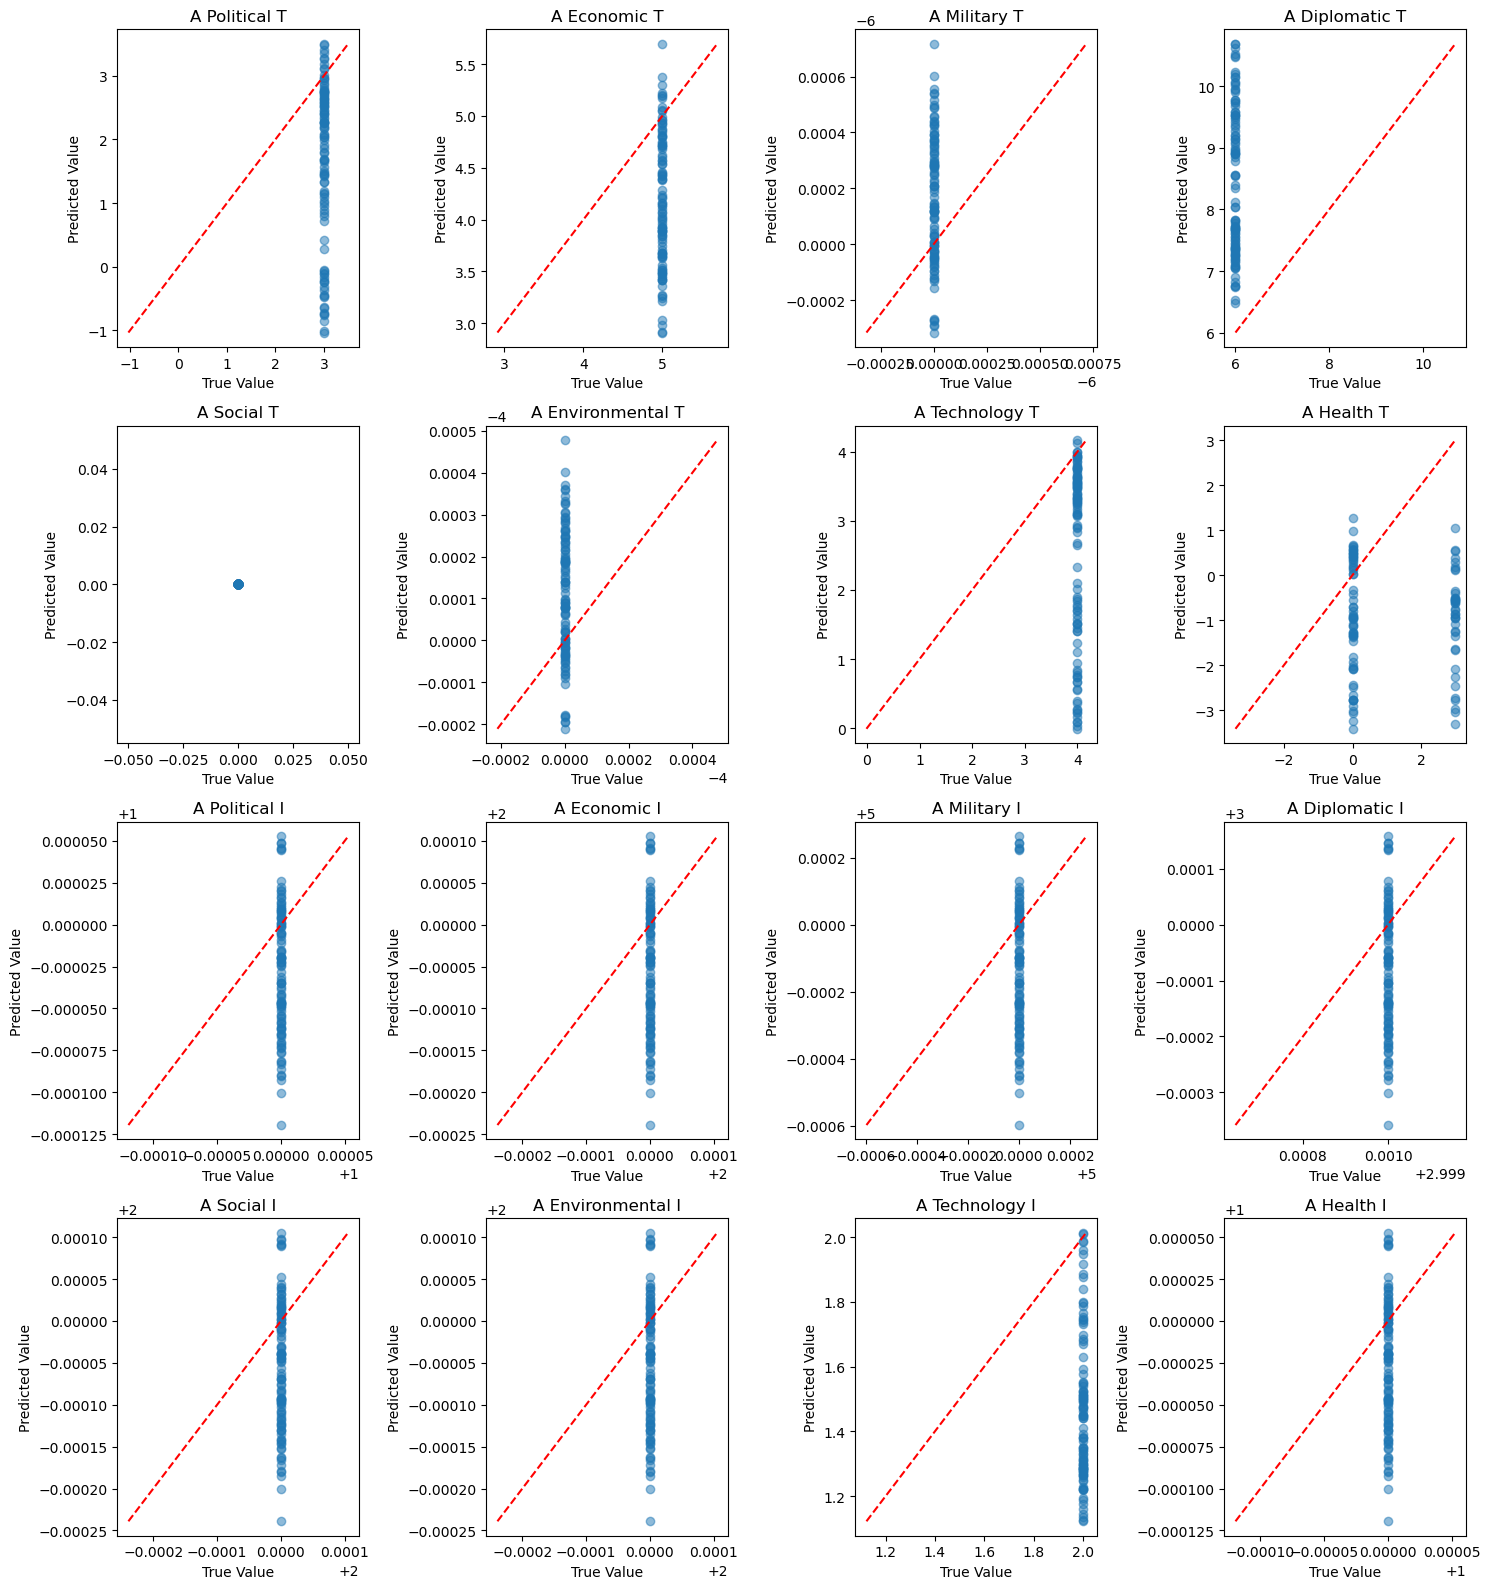

In [15]:
from sklearn.linear_model import Ridge

# 5. 构建 Ridge 模型（添加 L2 正则项）
# alpha 值表示正则化强度，可以根据实际情况调整
ridge_model = Ridge(alpha=1.0, solver='svd')
ridge_model.fit(X_train, y_train)

# 6. 模型预测与评估
y_pred = ridge_model.predict(X_test)

# 综合评估指标
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred, multioutput='uniform_average')
ev = explained_variance_score(y_test, y_pred, multioutput='uniform_average')

print("Test Mean Squared Error:", mse)
print("Test R² Score:", r2)
print("Test Mean Absolute Error:", mae)
print("Test Explained Variance:", ev)

# 针对每个目标变量单独评估
print("\n各目标变量的评价指标：")
for col_idx, col in enumerate(y_test.columns):
    r2_col = r2_score(y_test[col], y_pred[:, col_idx])
    mae_col = mean_absolute_error(y_test[col], y_pred[:, col_idx])
    mse_col = mean_squared_error(y_test[col], y_pred[:, col_idx])
    print(f"{col} -> R²: {r2_col:.4f}, MAE: {mae_col:.4f}, MSE: {mse_col:.4f}")

# 7. 可视化：绘制每个目标变量的预测值与真实值的散点图
n_targets = len(y_test.columns)
n_cols = 4  # 每行绘制4个子图
n_rows = int(np.ceil(n_targets / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(y_test.columns):
    axes[i].scatter(y_test[col], y_pred[:, i], alpha=0.5)
    axes[i].set_title(col)
    axes[i].set_xlabel("True Value")
    axes[i].set_ylabel("Predicted Value")
    # 绘制 y=x 参考线
    min_val = min(y_test[col].min(), y_pred[:, i].min())
    max_val = max(y_test[col].max(), y_pred[:, i].max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'r--')

# 删除多余的子图
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

由于我们数据生成时，大部分数据取值离散，所以线性回归拟合的

In [ ]:


# 10. 如果需要，你还可以保存训练好的模型进行后续使用
#import joblib
#joblib.dump(model, 'linear_regression_model.pkl')


['linear_regression_model.pkl']